Missing values statistics:
VNT     183
LUMN    103
CARR     41
OTIS     41
VIAC      1
ABT       0
ABBV      0
ABMD      0
ACN       0
ATVI      0
dtype: int64

Post-processing NaN summary:
0
Training set MSE: 5.76, R²: 0.57
Test set MSE: 45.27, R²: -6.34


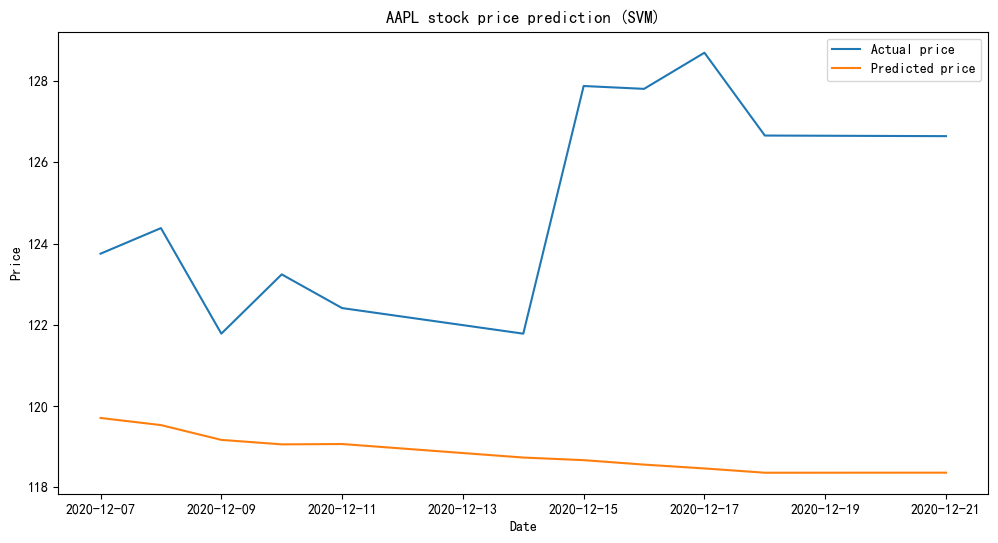

In [1]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('sp500_joined_closes.csv', index_col='Date', parse_dates=True)

# Select AAPL stock as target
target_stock = 'AAPL'
target = data[target_stock]

# Create features - use closing prices of all other stocks as features
features = data.drop(columns=[target_stock])

# Check for missing values
print("Missing values statistics:")
print(features.isna().sum().sort_values(ascending=False).head(10))

# Remove rows with missing values
features = features.dropna()
target = target[features.index]  # Align target with features
print("\nPost-processing NaN summary:")
print(features.isna().sum().sum())  # Should be 0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, shuffle=False)

# Create pipeline with imputation, scaling and SVR
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Fill missing values with mean
    StandardScaler(),               # Standardize features
    SVR(kernel='rbf', C=1.0, epsilon=0.1)  # SVM regression
)

# Train model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training set MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Test set MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual price')
plt.plot(y_test.index, y_pred_test, label='Predicted price')
plt.title(f'{target_stock} stock price prediction (SVM)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()